In [226]:
import numpy as np
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns   
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif
from tabulate import tabulate

In [227]:

url = "https://cdn.jsdelivr.net/gh/ramenfeast/BV-ethnicity-report/BV%20Dataset%20copy.csv"
download = requests.get(url).content
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#%%Clean data
df = df.drop([394,395,396], axis = 0)
df.loc[df['Nugent score'] <7, 'Nugent score'] = 0
df.loc[df['Nugent score'] >=7, 'Nugent score'] = 1

df['pH']=df['pH']/14

df=df.drop(labels= ['Ethnic Groupa', 'Community groupc '], axis=1)

df.iloc[:,:-1]=df.iloc[:,:-1]/100

#%% Separate the Data and Labels
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

#%% Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)


#%% Extract Ethinic group and commmunity group data
#es_xtest = X_test[['Ethnic Groupa']].copy()
#cs_xtest = X_test[['Community groupc ']].copy()
#X_test=X_test.drop(labels= ['Ethnic Groupa', 'Community groupc '], axis=1)


#es_xtrain = X_train[['Ethnic Groupa']].copy()
#cs_xtrain = X_train[['Community groupc ']].copy()
#X_train=X_train.drop(labels= ['Ethnic Groupa', 'Community groupc '], axis=1)

#%%Normalization

#Normalize pH
#X_train['pH']=X_train['pH']/14
#X_test['pH']=X_test['pH']/14

#Normalize 16s RNA data
#X_train.iloc[:,1::]=X_train.iloc[:,1::]/100
#X_test.iloc[:,1::]=X_test.iloc[:,1::]/100

#%%Binary y
#y_train[y_train<7]=0
#y_train[y_train>=7]=1

#y_test[y_test<7]=0
#y_test[y_test>=7]=1

#print(y_train)
#print(df)

In [228]:
#Get features highest ftest
fvalue_Best = SelectKBest(f_classif, k=75)
fvalue_Best.fit(X_train, y_train)
#print(X_kbest)
#print('Original number of features:', X.shape)
#print('Reduced number of features:', X_kbest.shape)

cols = fvalue_Best.get_support(indices=True) 
features_df_newtrain = X_train.iloc[:,cols]
features_df_newtest = X_test.iloc[:,cols]
#print(features_df_newtrain)
#features_df_newtrain.info()

#print(features_df_new_target.shape)
#print(features_df_new.shape[1])

allaccscores = [['Feature Test', 'Accuracy']]
Normalacclist = []
#original RF
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_train, y_train)
    y_pred = clfrf.predict(X_test)
    Normalacclist.append(accuracy_score(y_test,y_pred))
orarr = np.array(Normalacclist)
arrmean = np.mean(orarr)
print('Normal RF acc average =', arrmean)
#print(orarr)

allaccscores.append(['Original RF', arrmean])

#Ftest RF

Ftestacclist = []
for x in range(10):
    clfrf_imp = RandomForestClassifier(n_estimators=100, random_state=0)
    clfrf_imp.fit(features_df_newtrain,y_train)
    y_pred_imp = clfrf_imp.predict(features_df_newtest)
    Ftestacclist.append(accuracy_score(y_test,y_pred))
ftestarr = np.array(Ftestacclist)
arrmean = np.mean(ftestarr)
print('Ftest RF acc average =', arrmean)

allaccscores.append(['Ftest', arrmean])

/Users/dionming/opt/anaconda3/envs/BVrun/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 95 134 208 212 231 237] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/dionming/opt/anaconda3/envs/BVrun/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Normal RF acc average = 0.9240506329113923
Ftest RF acc average = 0.9240506329113923


In [229]:
from scipy import stats

#pointbiserial
#used when one variable is interval and other variable has only 2 possible variables
significantlist = []
correlationlist = []
for (columnName, X_trainfeature) in X_train.iteritems():
    #point biserial 
    correlation_value,p_value= stats.pointbiserialr(X_trainfeature, y_train)
    #print(columnName)
    #correlationvalue and pvalue of correlating feature and Nugent
    #print('pearson value:',correlation_value)
    #print('p-value:',p_value)

    alpha = 0.05

    if p_value < alpha:
        significantlist.append(columnName)
        #if between .5 and 1 is strongly correlated
        if correlation_value > abs(.5): 
            correlationlist.append(columnName)
'''
print('significant list:')
print(significantlist)
print(len(significantlist))
print('correlation list:')
print(correlationlist)
print(len(correlationlist))
'''

correlationlist.append('Nugent score')
significantlist.append('Nugent score')


/Users/dionming/opt/anaconda3/envs/BVrun/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [230]:

#original RF
Normalacclist = []
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_train, y_train)
    y_pred = clfrf.predict(X_test)
    Normalacclist.append(accuracy_score(y_test,y_pred))
arr = np.array(Normalacclist)
arrmean = np.mean(arr)
print('Normal RF acc average =', arrmean)


#pointbiserial
dfbiserialcorr = df[correlationlist]

#dfbiserialcorr.loc[dfbiserialcorr['Nugent score'] <7, 'Nugent score'] = 0
#dfbiserialcorr.loc[dfbiserialcorr['Nugent score'] >=7, 'Nugent score'] = 1

#print(dfbiserial)
X = dfbiserialcorr.iloc[:,:-1]
y = dfbiserialcorr.iloc[:,-1]
X_trainpbc, X_testpbc, y_trainpbc, y_testpbc = train_test_split(X, y,test_size=0.2, random_state=0)


#print(X)
#print(y)

corrbiserialacclist = []
#Biserial RF (with the 7)
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_trainpbc, y_trainpbc)
    y_pred = clfrf.predict(X_testpbc)
    corrbiserialacclist.append(accuracy_score(y_testpbc, y_pred))
arr = np.array(corrbiserialacclist)
arrmean = np.mean(arr)
print('Correlation List Point Bisderial RF acc average =', arrmean)

allaccscores.append(['PB alpha,pearson', arrmean])

dfbiserialsig = df[significantlist]

#dfbiserialsig.loc[dfbiserialsig['Nugent score'] <7, 'Nugent score'] = 0
#dfbiserialsig.loc[dfbiserialsig['Nugent score'] >=7, 'Nugent score'] = 1

#print(dfbiserial)
X = dfbiserialsig.iloc[:,:-1]
y = dfbiserialsig.iloc[:,-1]
X_trainpbs, X_testpbs, y_trainpbs, y_testpbs = train_test_split(X, y,test_size=0.2, random_state=0)

sigbiserialacclist = []
#Biserial RF (with 68)
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_trainpbs, y_trainpbs)
    y_pred = clfrf.predict(X_testpbs)
    sigbiserialacclist.append(accuracy_score(y_testpbs, y_pred))
#print(sigbiserialacclist)
arr = np.array(sigbiserialacclist)
arrmean = np.mean(arr)
print('Significant list Point Biserial RF acc average =', arrmean)

allaccscores.append(['PB alpha', arrmean])

Normal RF acc average = 0.9240506329113923
Correlation List Point Bisderial RF acc average = 0.9367088607594937
Significant list Point Biserial RF acc average = 0.9367088607594937


In [231]:
from scipy import stats

#Ttest

Nugent0 = df[df['Nugent score'] == 0]
#print(Nugent0)
Nugent1 = df[df['Nugent score'] == 1]
#print(Nugent1)

impfeat =[]
for column in Nugent0:
    Nugent0data = Nugent0[column]
    Nugent1data = Nugent1[column]
    tstat, pval = stats.ttest_ind(a = Nugent0data, b = Nugent1data, alternative="two-sided")
    
    alpha = 0.05
    if pval < alpha:
        #print('Feature:', column)
        #print("t-stat: {:.2f}   pval: {:.4f}".format(tstat, pval))
        impfeat.append(column)
#print(impfeat)
#print(len(impfeat))

#original RF
Normalacclist = []
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_train, y_train)
    y_pred = clfrf.predict(X_test)
    Normalacclist.append(accuracy_score(y_test,y_pred))
arr = np.array(Normalacclist)
arrmean = np.mean(arr)
print('Normal RF acc average =', arrmean)


#Ttest RF
dfttestimpfeat = df[impfeat]

X = dfttestimpfeat.iloc[:,:-1]
y = dfttestimpfeat.iloc[:,-1]
X_traint, X_testt, y_traint, y_testt = train_test_split(X, y,test_size=0.2, random_state=0)

ttestacclist = []
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_traint, y_traint)
    y_pred = clfrf.predict(X_testt)
    ttestacclist.append(accuracy_score(y_testt, y_pred))
arr = np.array(ttestacclist)
arrmean = np.mean(arr)
print('Important features Ttest RF acc average =', arrmean)

allaccscores.append(['Ttest', arrmean])

    #nugent0ph = Nugent0['pH']
    #nugent1ph = Nugent1['pH']
    #tstat, pval = stats.ttest_ind(a = nugent0ph, b = nugent1ph, alternative="two-sided")
    #print("t-stat: {:.2f}   pval: {:.4f}".format(tstat, pval))
    

Normal RF acc average = 0.9240506329113923
Important features Ttest RF acc average = 0.9367088607594937


Sneathia                      :0.5901997162501362
Dialister                     :0.10121666221347494
Gardnerella                   :0.0358175773196591
Megasphaera                   :0.03317716763633077
L. crispatus                  :0.03093964858670741
pH                            :0.02378474900932159
Lactobacillales_5             :0.02291825821237586
Clostridiales_17              :0.022612681436210792
Parvimonas                    :0.020626432391138275
Bilophila                     :0.016881752701080444
Lachnospiraceae_8             :0.01680976493574109
Finegoldia                    :0.016289410501042528
Lactobacillales_1             :0.015756302521008406
Anaeroglobus                  :0.015727706690661748
Streptococcus                 :0.012891520244461423
Lactobacillales_6             :0.012891520244461423
Corynebacterium               :0.01145912910618793
Granulicatella                :0.0
Lactococcus                   :0.0
Lachnospiraceae_6             :0.0
Bacteroidetes_12      

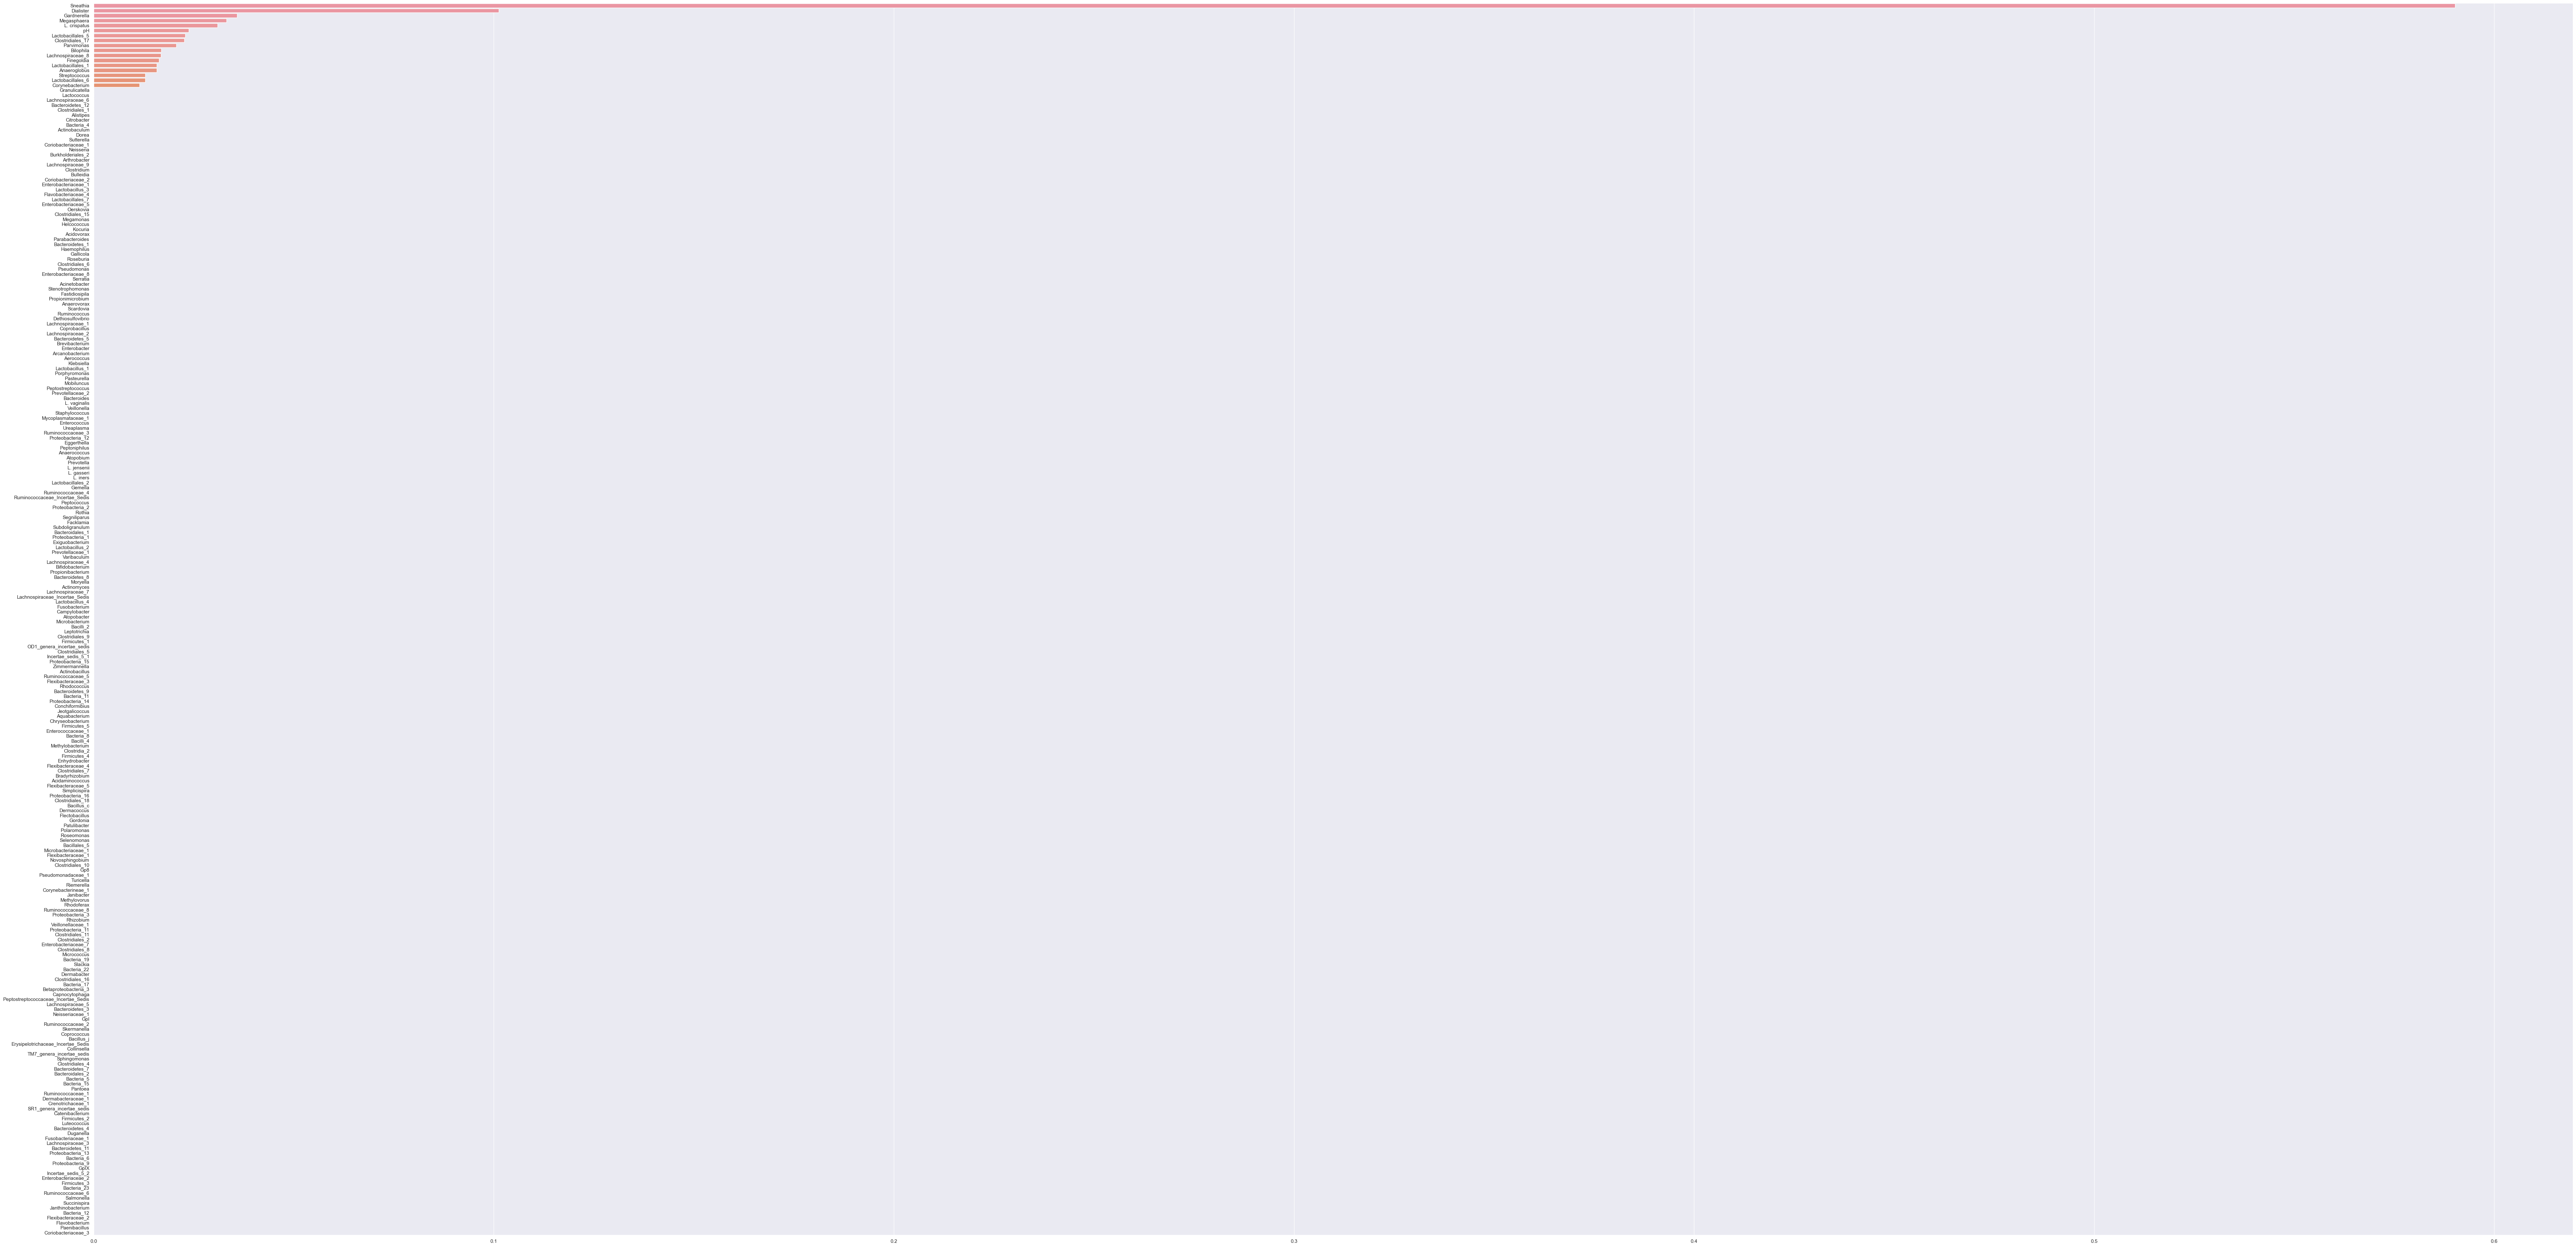

In [232]:
from sklearn.tree import DecisionTreeClassifier
 
#calculates gini gain (higher gain more important feature)
clf = DecisionTreeClassifier(criterion='gini')
 
# Fit the decision tree classifier
clf = clf.fit(X_train, y_train)

# Print the feature importances
feature_importances = clf.feature_importances_
#print(feature_importances)
 
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]

#array of columns # in feature importance
#print(sorted_indices)
#sorted_feature_names = dataset.feature_names[sorted_indices]

#array of names sorted accoridng to index of feature importance
sorted_feature_names = X_train.columns[sorted_indices]
#print(sorted_feature_names)


#loop through sorted_importances list
    #if >0 get index put name in new list from sorted_feature_names 

sorted_importances = feature_importances[sorted_indices]
#print(sorted_importances)

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(100,50)})
sns.barplot(x = sorted_importances, y = sorted_feature_names)
#sns.barplot(sorted_importances)

#get list of only important features from gini
giniimplist = []
for i in range(len(sorted_importances)): 
    if sorted_importances[i] > 0:
        giniimplist.append(sorted_feature_names[i])
#print(giniimplist)

giniimplist.append('Nugent score')
dfginiimp = df[giniimplist]

for i in range(len(sorted_feature_names)):
    print(sorted_feature_names[i].ljust(30)+":"+str(sorted_importances[i]))
    #print(dfginiimp.info())




In [233]:


#original RF
Normalacclist = []
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_train, y_train)
    y_pred = clfrf.predict(X_test)
    Normalacclist.append(accuracy_score(y_test,y_pred))
arr = np.array(Normalacclist)
arrmean = np.mean(arr)
print('Normal RF acc average =', arrmean)

#Gini RF
X = dfginiimp.iloc[:,:-1]
y = dfginiimp.iloc[:,-1]
X_traing, X_testg, y_traing, y_testg = train_test_split(X, y,test_size=0.2, random_state=0)

giniacclist = []
for x in range(10):
    clfrf = RandomForestClassifier(n_estimators = 100, random_state=0)
    clfrf.fit(X_traing, y_traing)
    y_pred = clfrf.predict(X_testg)
    giniacclist.append(accuracy_score(y_testg, y_pred))
arr = np.array(giniacclist)
arrmean = np.mean(arr)
print('Important features Gini RF acc average =', arrmean)

allaccscores.append(['Gini', arrmean])

Normal RF acc average = 0.9240506329113923
Important features Gini RF acc average = 0.9493670886075949


In [234]:

#print(allaccscores)
print(tabulate(allaccscores, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤════════════╕
│ Feature Test     │   Accuracy │
╞══════════════════╪════════════╡
│ Original RF      │   0.924051 │
├──────────────────┼────────────┤
│ Ftest            │   0.924051 │
├──────────────────┼────────────┤
│ PB alpha,pearson │   0.936709 │
├──────────────────┼────────────┤
│ PB alpha         │   0.936709 │
├──────────────────┼────────────┤
│ Ttest            │   0.936709 │
├──────────────────┼────────────┤
│ Gini             │   0.949367 │
╘══════════════════╧════════════╛
